In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 28.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.5 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found existin

In [2]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


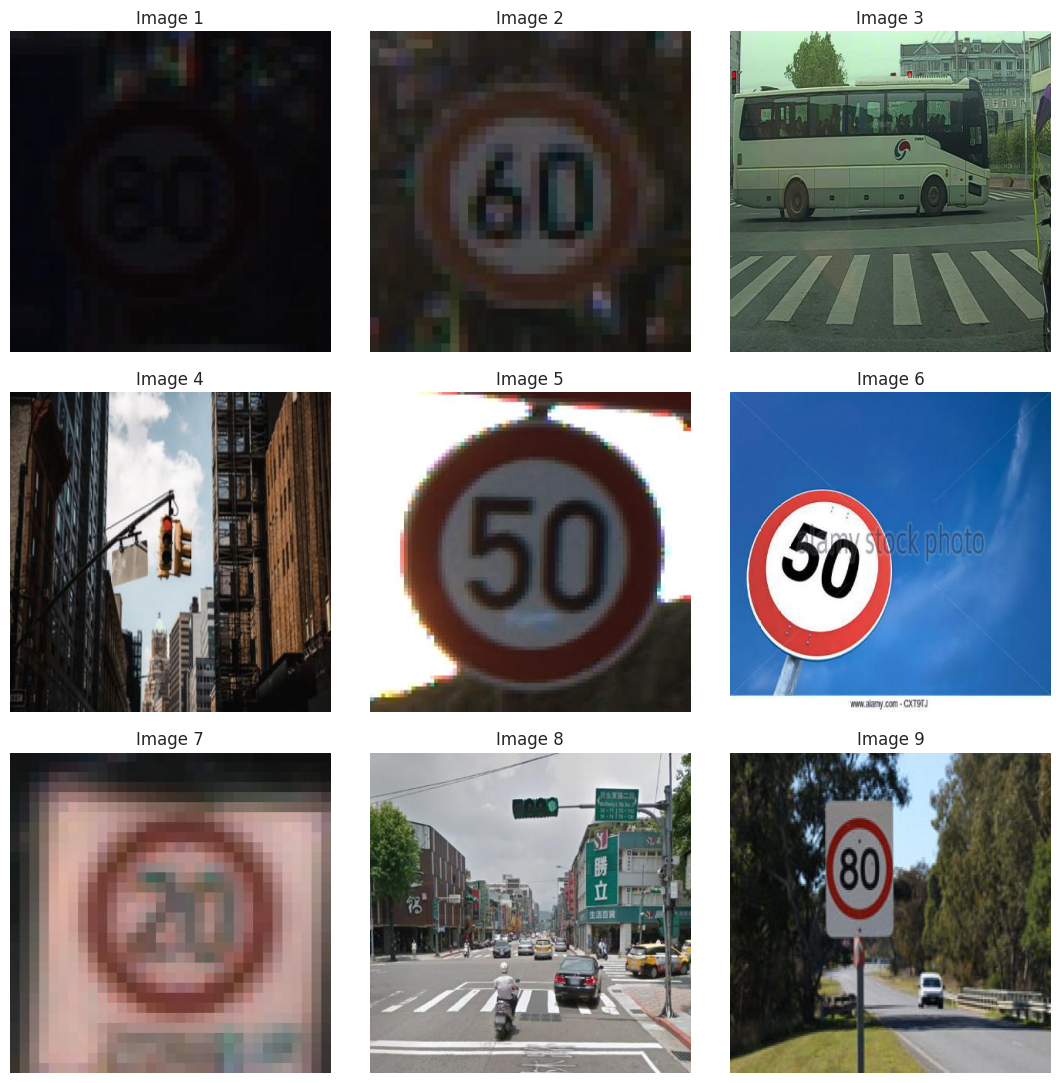

In [3]:
Image_dir = '/kaggle/input/cardetection/car/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [4]:
from ultralytics import YOLO

model = YOLO("yolov8m.pt")
results = model.predict(source="/kaggle/input/cardetection/car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg")
result = results[0]

for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

100%|██████████| 49.7M/49.7M [00:00<00:00, 227MB/s]



image 1/1 /kaggle/input/cardetection/car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 640x640 1 stop sign, 16.4ms
Speed: 12.3ms preprocess, 16.4ms inference, 254.9ms postprocess per image at shape (1, 3, 640, 640)
Object type: stop sign
Coordinates: [157, 214, 166, 229]
Probability: 0.48
---


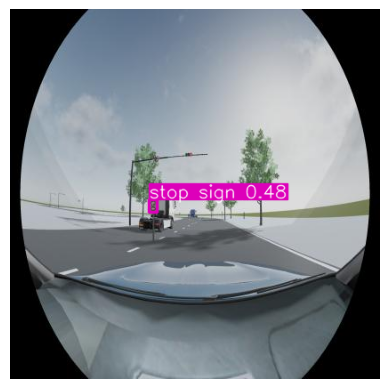

In [5]:
plot = result.plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)

plt.imshow(plot)
plt.axis('off')
plt.show()

In [6]:
results = model.train(data='/kaggle/input/cardetection/car/data.yaml', imgsz=512, epochs=15, batch=8)

Ultralytics 8.3.129 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/cardetection/car/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True

100%|██████████| 755k/755k [00:00<00:00, 28.5MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 103MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.4±0.2 ms, read: 4.2±0.9 MB/s, size: 24.1 KB)


train: Scanning /kaggle/input/cardetection/car/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:20<00:00, 171.80it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/cardetection/car/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3.5±2.2 MB/s, size: 20.7 KB)


val: Scanning /kaggle/input/cardetection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:04<00:00, 165.28it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/cardetection/car/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      3.64G      1.155      3.107      1.443          6        512: 100%|██████████| 442/442 [01:53<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.25it/s]

                   all        801        944      0.287      0.463      0.313       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      3.66G     0.7382      1.954      1.108          3        512: 100%|██████████| 442/442 [01:50<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:08<00:00,  6.01it/s]

                   all        801        944      0.438      0.573       0.48        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      3.66G     0.7037      1.579       1.07          7        512: 100%|██████████| 442/442 [01:49<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:08<00:00,  6.03it/s]

                   all        801        944      0.621       0.66      0.668      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      3.66G       0.68      1.303      1.049          4        512: 100%|██████████| 442/442 [01:49<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:08<00:00,  6.03it/s]

                   all        801        944      0.756      0.717      0.762      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      3.66G     0.6515      1.119      1.028          4        512: 100%|██████████| 442/442 [01:49<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:08<00:00,  6.07it/s]


                   all        801        944      0.872      0.765      0.851      0.725
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      3.66G     0.6114      0.788     0.9548          3        512: 100%|██████████| 442/442 [01:50<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:08<00:00,  6.05it/s]


                   all        801        944      0.888      0.795      0.868      0.737

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      3.66G      0.598     0.6785     0.9439          5        512: 100%|██████████| 442/442 [01:49<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:08<00:00,  6.05it/s]

                   all        801        944      0.917      0.801      0.881      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      3.66G     0.5775     0.5662     0.9385          2        512: 100%|██████████| 442/442 [01:49<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:08<00:00,  6.04it/s]


                   all        801        944      0.891      0.851      0.899      0.765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      3.66G      0.566     0.5207     0.9291          3        512: 100%|██████████| 442/442 [01:49<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:08<00:00,  6.08it/s]

                   all        801        944      0.929      0.857      0.921      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      3.66G     0.5534     0.4697     0.9171          2        512: 100%|██████████| 442/442 [01:50<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:08<00:00,  6.06it/s]


                   all        801        944      0.937      0.855      0.928      0.794

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      3.66G     0.5458     0.4446     0.9179          2        512: 100%|██████████| 442/442 [01:49<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:08<00:00,  6.06it/s]

                   all        801        944      0.958      0.832      0.929      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      3.66G     0.5366     0.4162     0.9142          2        512: 100%|██████████| 442/442 [01:49<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:08<00:00,  6.02it/s]

                   all        801        944       0.96      0.852      0.935      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      3.66G     0.5202     0.3856     0.9065          2        512: 100%|██████████| 442/442 [01:50<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:08<00:00,  6.09it/s]


                   all        801        944      0.964      0.859      0.945      0.815

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      3.66G     0.5164     0.3691     0.9008          3        512: 100%|██████████| 442/442 [01:50<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:08<00:00,  6.10it/s]


                   all        801        944      0.951        0.9      0.949      0.825

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      3.66G     0.5018     0.3502     0.8899          2        512: 100%|██████████| 442/442 [01:49<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:08<00:00,  6.10it/s]

                   all        801        944       0.96      0.897      0.951      0.825



15 epochs completed in 0.499 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.129 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 92 layers, 25,848,445 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:08<00:00,  5.67it/s]


                   all        801        944       0.96      0.896      0.951      0.825
           Green Light         87        122      0.906      0.738      0.799       0.47
             Red Light         74        108      0.836       0.71      0.793        0.5
       Speed Limit 100         52         52      0.938      0.942      0.977      0.893
       Speed Limit 110         17         17      0.934      0.941      0.972      0.895
       Speed Limit 120         60         60          1      0.963      0.995       0.92
        Speed Limit 20         56         56          1      0.982      0.986      0.866
        Speed Limit 30         71         74       0.99      0.946      0.984      0.916
        Speed Limit 40         53         55      0.981      0.931      0.987      0.885
        Speed Limit 50         68         71       0.95      0.915      0.974      0.871
        Speed Limit 60         76         76      0.986      0.912      0.971      0.885
        Speed Limit 7

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 7.4ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train


In [10]:
# Loading the best performing model
Valid_model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

# final results 
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.129 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 92 layers, 25,848,445 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.7 ms, read: 35.8±8.1 MB/s, size: 19.3 KB)


val: Scanning /kaggle/input/cardetection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:01<00:00, 713.65it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/cardetection/car/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.33it/s]


                   all        801        944       0.96      0.898      0.952      0.825
           Green Light         87        122      0.903      0.738      0.798      0.475
             Red Light         74        108      0.848      0.722      0.802      0.501
       Speed Limit 100         52         52      0.935      0.942      0.977      0.894
       Speed Limit 110         17         17      0.931      0.941      0.972      0.883
       Speed Limit 120         60         60          1      0.964      0.995      0.921
        Speed Limit 20         56         56      0.999      0.982      0.986      0.868
        Speed Limit 30         71         74      0.989      0.946      0.984      0.916
        Speed Limit 40         53         55      0.981      0.932      0.987      0.883
        Speed Limit 50         68         71      0.948      0.915      0.974      0.875
        Speed Limit 60         76         76      0.986      0.912      0.971      0.886
        Speed Limit 7

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.3ms preprocess, 7.7ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val
precision(B):  0.9603175305208229
metrics/recall(B):  0.8978064099616113
metrics/mAP50(B):  0.9519425230275462
metrics/mAP50-95(B):  0.8252504494478368


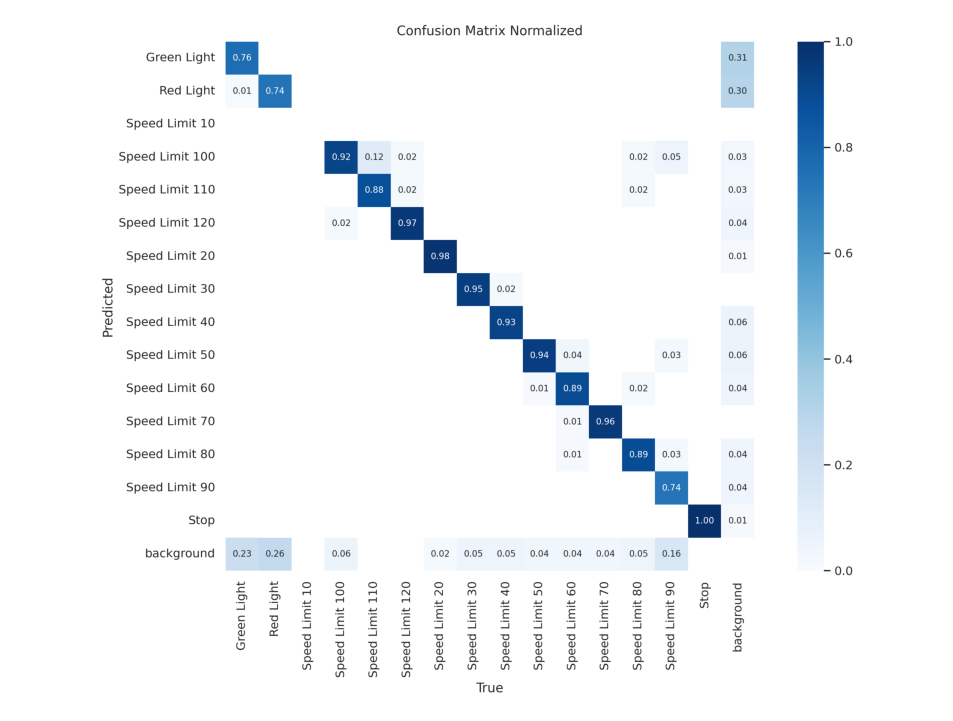

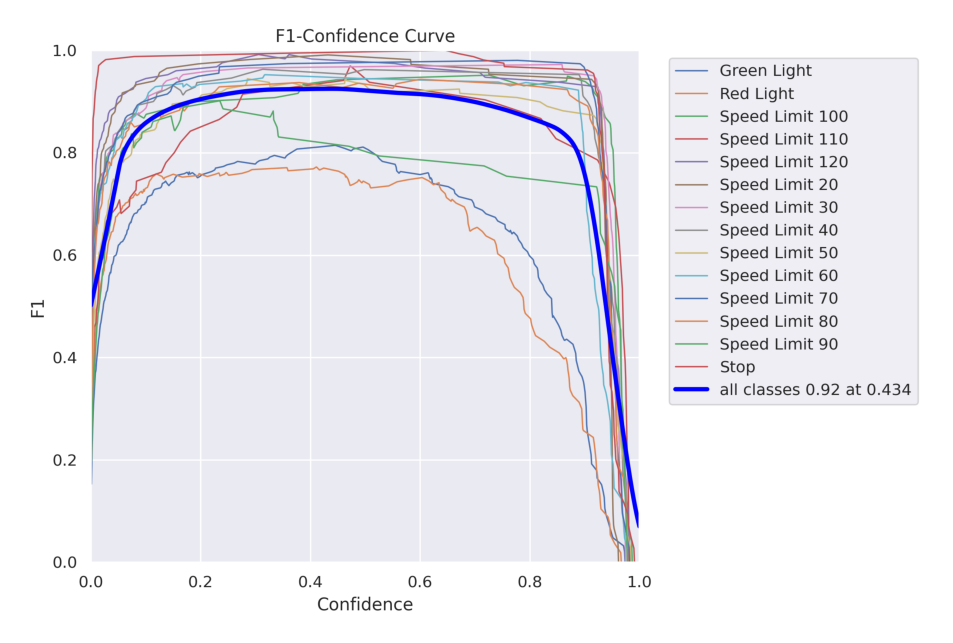

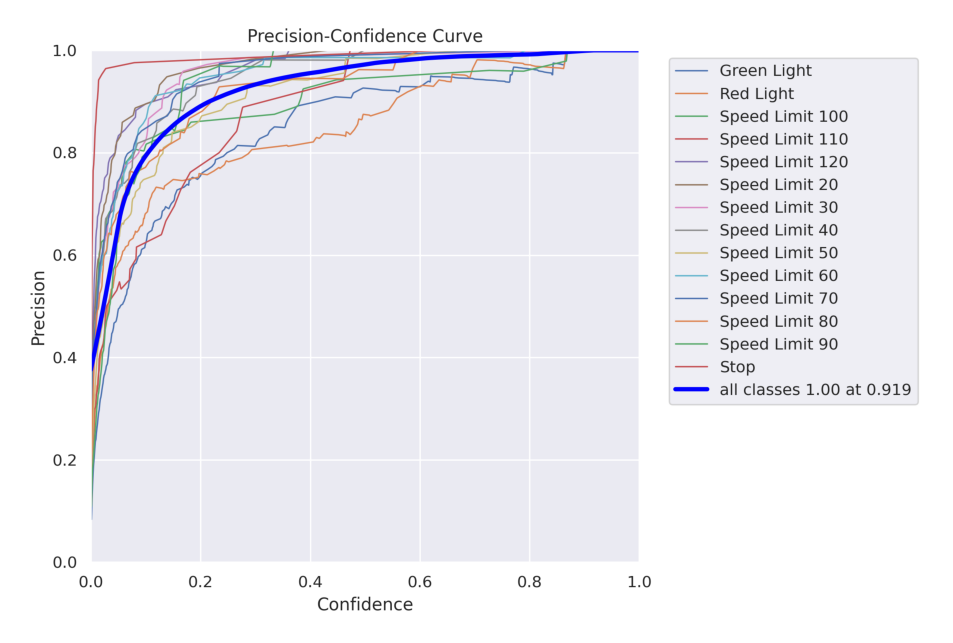

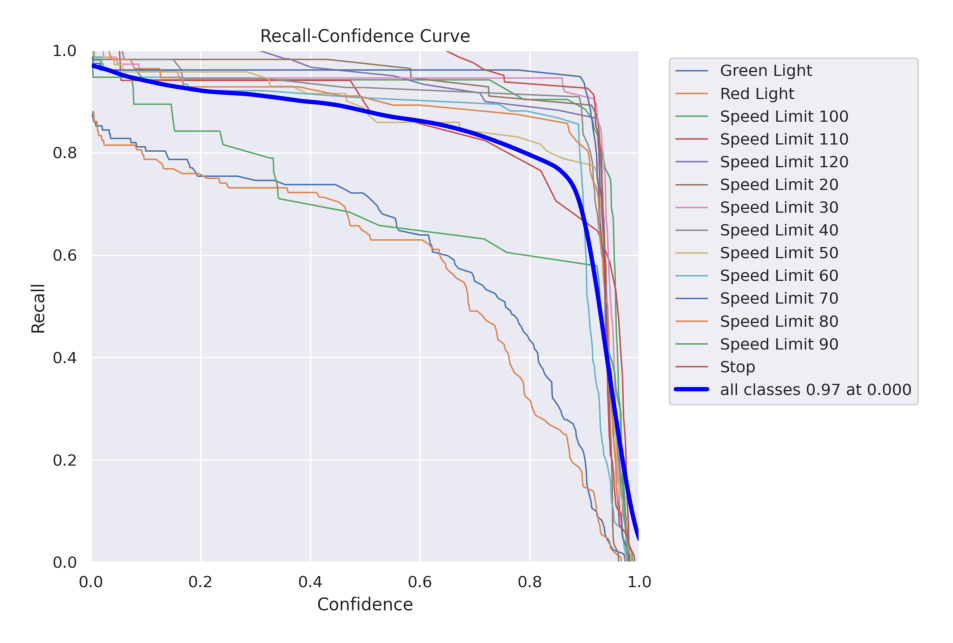

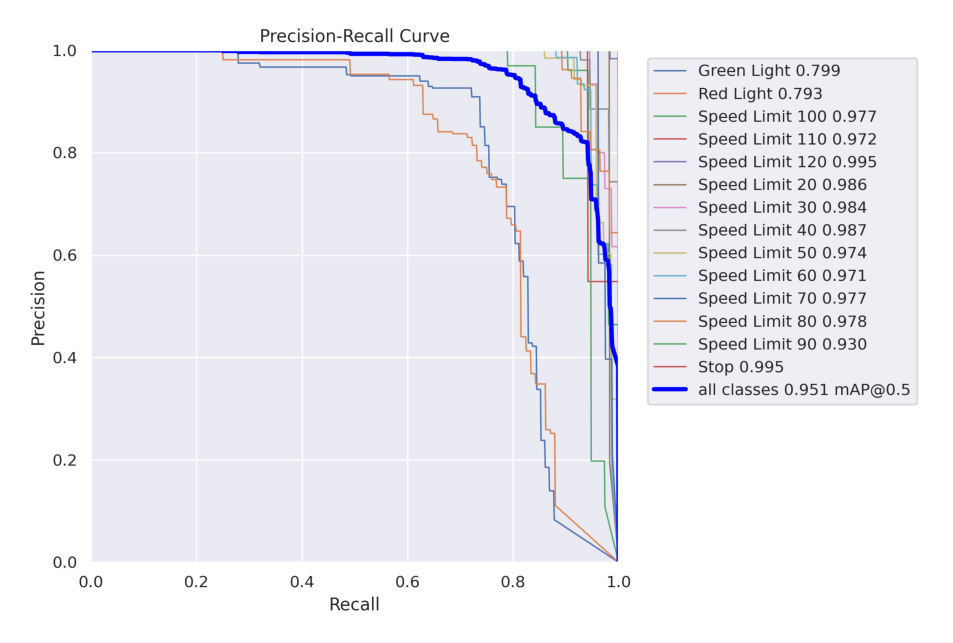

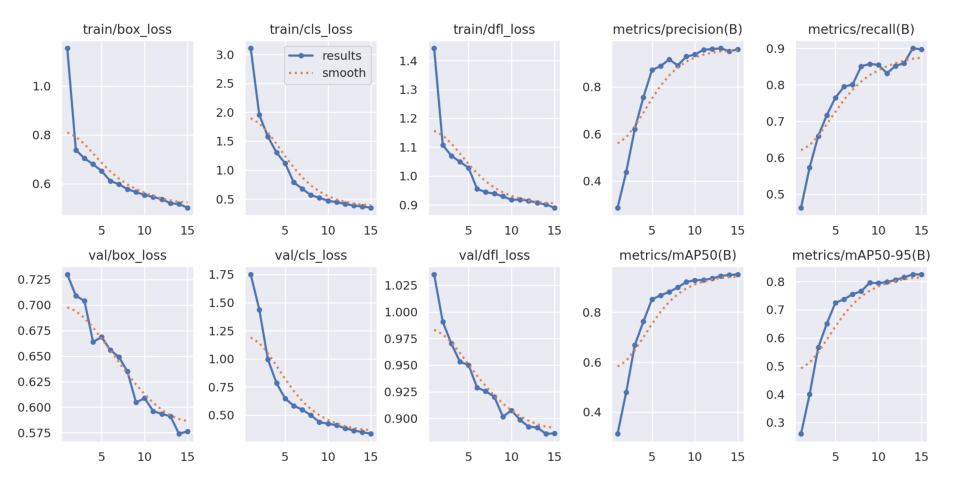

In [12]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = '/kaggle/working/runs/detect/train'

# Display the images
display_images(post_training_files_path, image_files)


0: 640x640 1 Speed Limit 50, 1 Speed Limit 80, 16.2ms
Speed: 2.8ms preprocess, 16.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 16.2ms
Speed: 2.7ms preprocess, 16.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 120, 16.3ms
Speed: 1.7ms preprocess, 16.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 40, 16.3ms
Speed: 2.3ms preprocess, 16.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 120, 14.8ms
Speed: 2.7ms preprocess, 14.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 120, 15.0ms
Speed: 2.1ms preprocess, 15.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Stop, 14.9ms
Speed: 1.7ms preprocess, 14.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 80, 14.9ms
Speed: 1.6ms pr

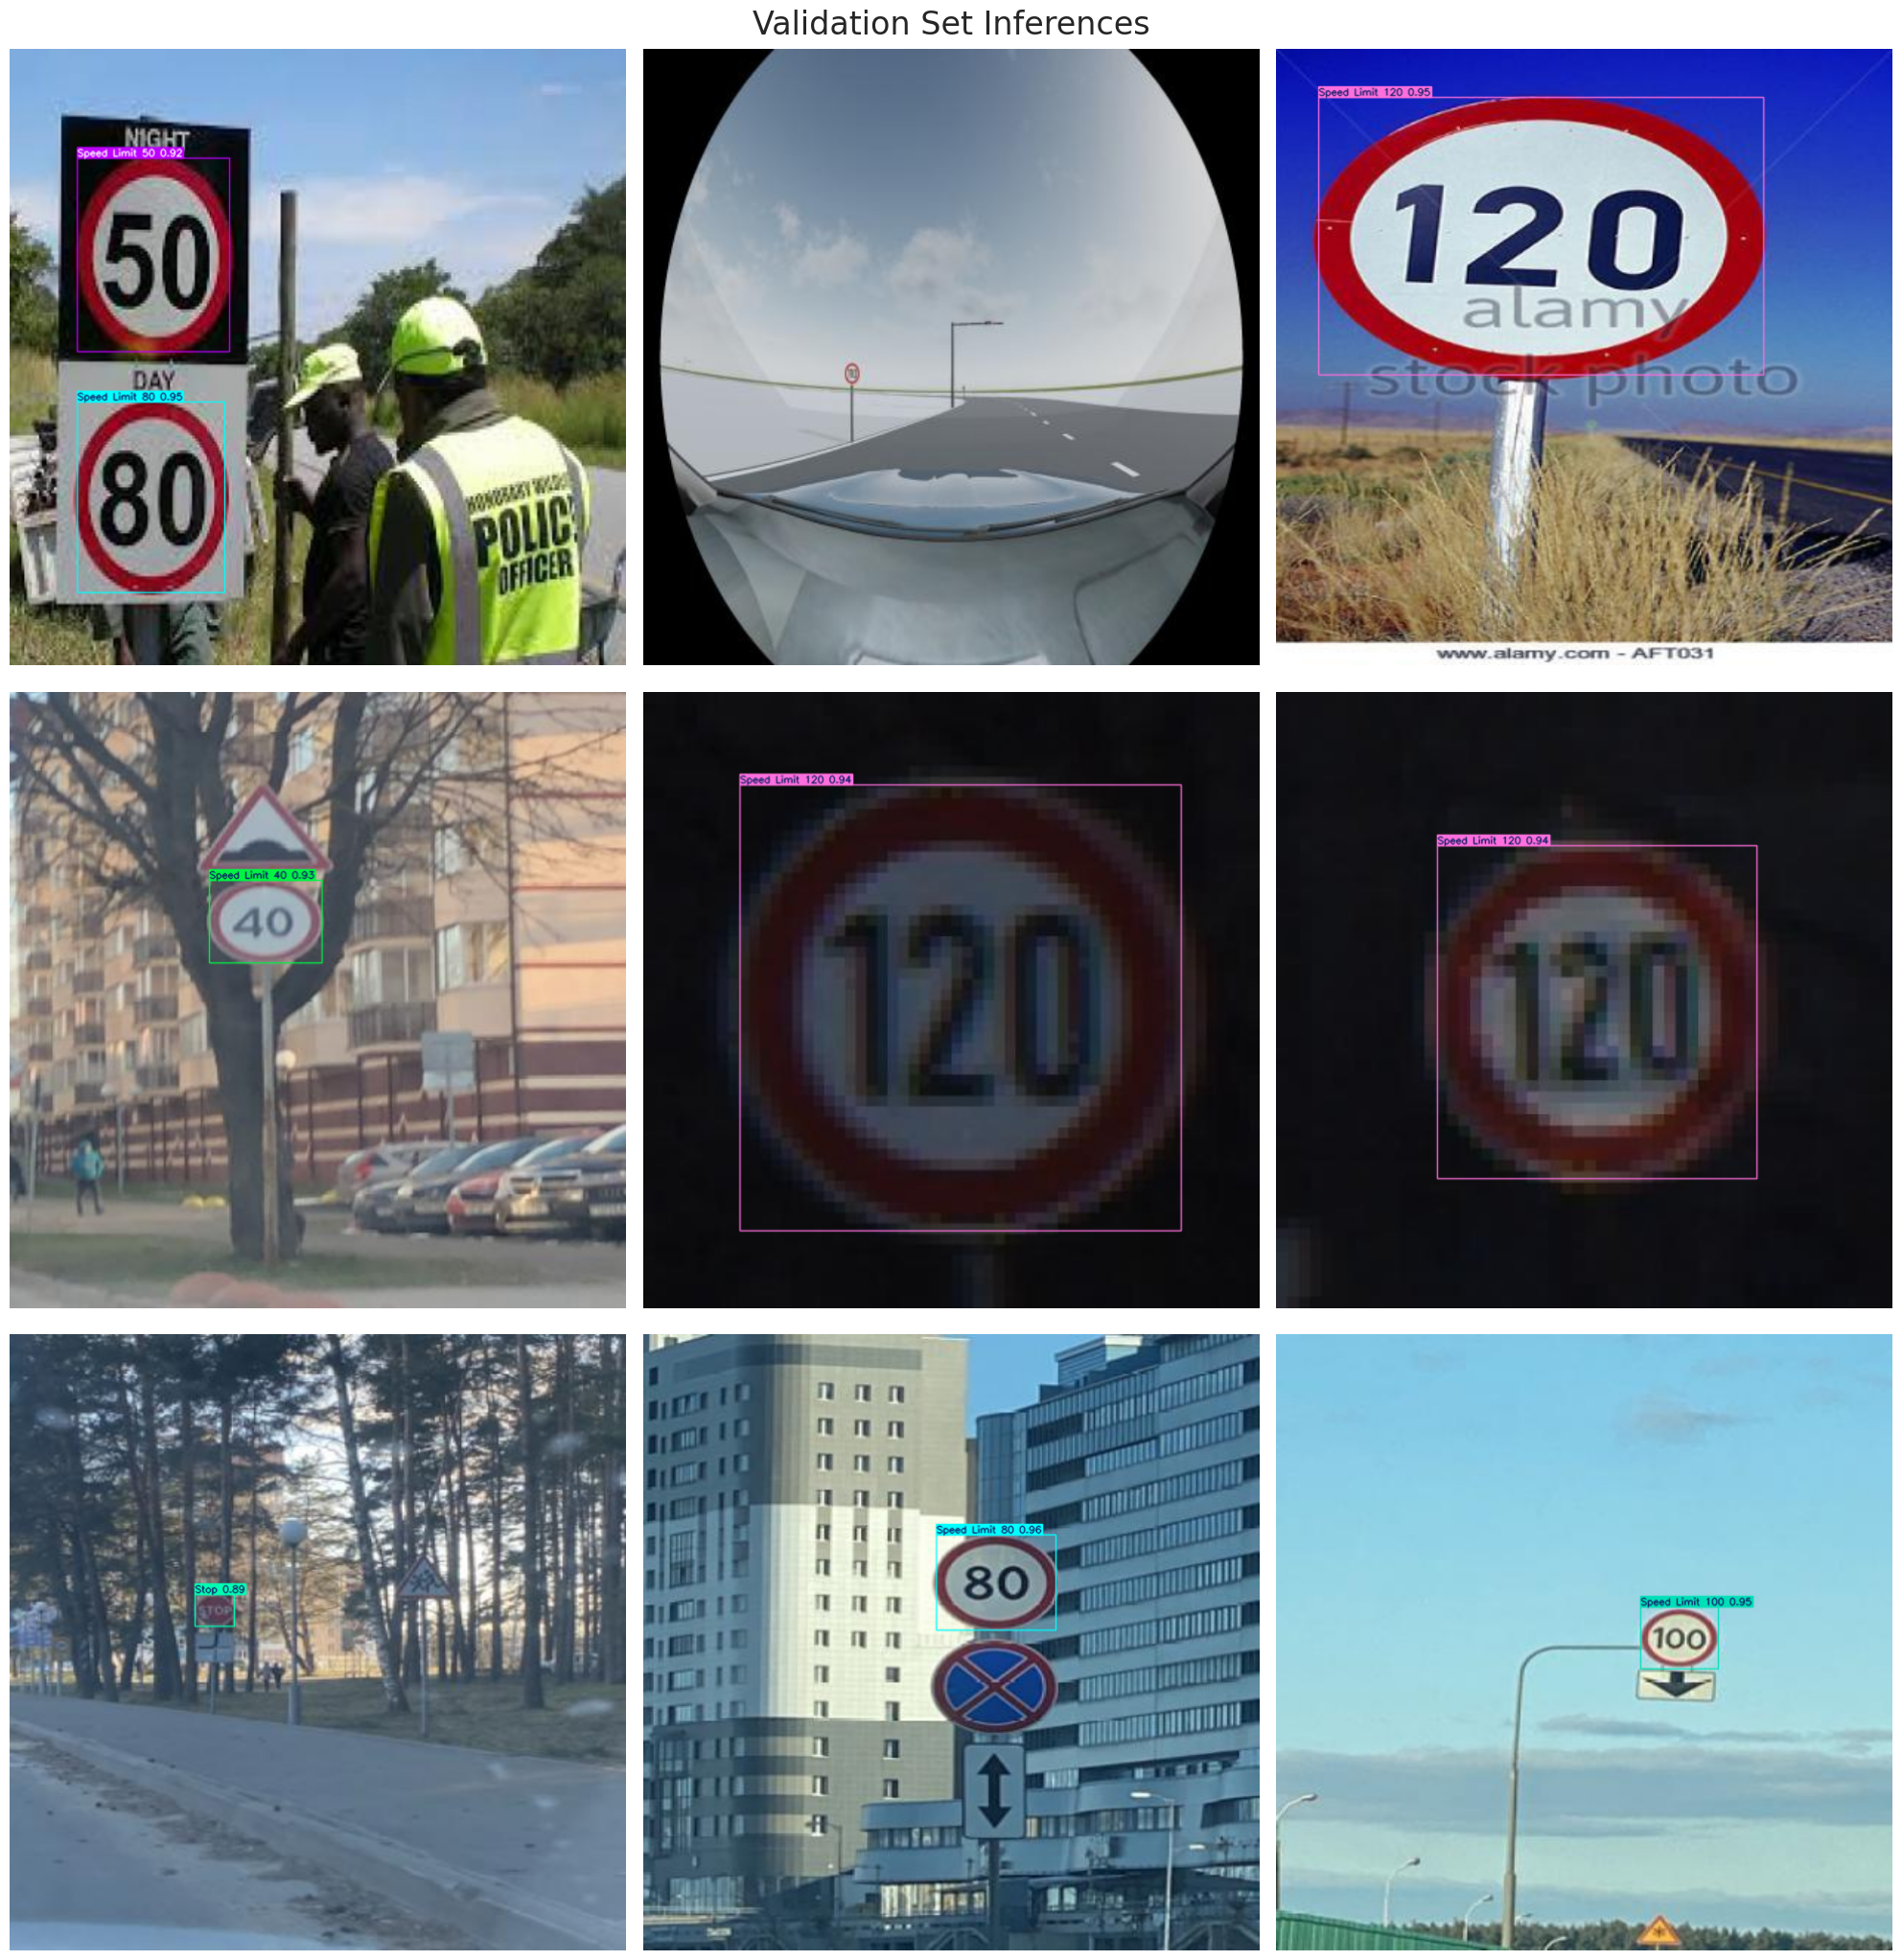

In [11]:
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = '/kaggle/input/cardetection/car'  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])
            
            # Load image
            image = cv2.imread(image_path)
            
            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)
                
                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)
                
                # Predict with the model
                results = Valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)
                
                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()